In [2]:
#Importing Libraries
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as custom_transforms
import torchvision.models as models
from torchvision.models import MobileNet_V2_Weights
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as custom_datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt



In [3]:

# Define transformations for training with data augmentation (i.e horizontal flip and random crop) and Normalization
image_transforms_train = custom_transforms.Compose([

    custom_transforms.RandomHorizontalFlip(), # Flip images horizontally
    custom_transforms.RandomCrop(32, padding=4), #crop with padding
    custom_transforms.ToTensor(), #convert images to tensor
    custom_transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #Normalization
])
## Define transformations for testing for only normalization
image_transforms_test = custom_transforms.Compose([

    custom_transforms.ToTensor(),
    custom_transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset and defined Transformations
train_data = custom_datasets.CIFAR10(root='./dataset_cache', train=True, download=True, transform=image_transforms_train)
test_data = custom_datasets.CIFAR10(root='./dataset_cache', train=False, download=True, transform=image_transforms_test)

# Split into training dataset into traning and validationwith 80% training and 20% validation
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = random_split(train_data, [train_size, val_size])

# Data loaders for training , validation and testing
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the device for computation GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)



100%|██████████| 170M/170M [00:01<00:00, 106MB/s]


Extracting ./dataset_cache/cifar-10-python.tar.gz to ./dataset_cache
Files already downloaded and verified
Using device: cpu


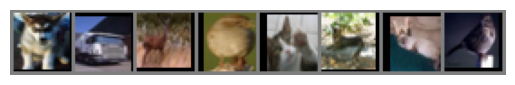

Labels: ['dog', 'truck', 'deer', 'bird', 'cat', 'cat', 'cat', 'bird']


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# defining a function to display images with class labels
def display_custom_image(image_batch):
    image_batch = image_batch / 2 + 0.5  # Unnormalize images to [0, 1] range
    np_image = image_batch.numpy()  #converting to numpy for visualization
    plt.imshow(np.transpose(np_image, (1, 2, 0))) # Transpose to display correctly
    plt.axis('off') # turn off the axes
    plt.show()

# CIFAR-10 class names for labeling the images
class_labels_custom = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preview a batch of images and labels
data_iter_custom = iter(train_loader)
images_custom, labels_custom = next(data_iter_custom)

# Display images and labels
display_custom_image(torchvision.utils.make_grid(images_custom[:8]))#display first 8 images along with correspond labels
print('Labels:', [class_labels_custom[label] for label in labels_custom[:8].numpy()])




Define and Modify the Models for CIFAR-10

In [5]:
# Load ResNet-18
model_custom_resnet18 = models.resnet18(weights=True)
model_custom_resnet18.fc = nn.Linear(model_custom_resnet18.fc.in_features, 10)
model_custom_resnet18 = model_custom_resnet18.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 142MB/s]


In [6]:
# Load ResNet-34
model_custom_resnet34 = models.resnet34(pretrained=True)
model_custom_resnet34.fc = nn.Linear(model_custom_resnet34.fc.in_features, 10)
model_custom_resnet34 = model_custom_resnet34.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 121MB/s]


In [7]:
# Load VGG-16
model_custom_vgg16 = models.vgg16(pretrained=True)
model_custom_vgg16.classifier[6] = nn.Linear(model_custom_vgg16.classifier[6].in_features, 10)
model_custom_vgg16 = model_custom_vgg16.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 140MB/s]


In [8]:
# Load pre-trained MobileNetV2 model and modify the final layer
# Load MobileNetV2 with updated weights parameter and modify the final layer
model_custom_mobilenet = models.mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
model_custom_mobilenet.classifier[1] = nn.Linear(model_custom_mobilenet.last_channel, 10)  # Modify output layer for 10 CIFAR-10 classes
model_custom_mobilenet = model_custom_mobilenet.to(device)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 96.5MB/s]


In [9]:
# Define loss function
custom_loss = nn.CrossEntropyLoss()

# Define optimizers for each model with learning rate 0.001
optimizer_resnet18 = optim.Adam(model_custom_resnet18.parameters(), lr=0.001)
optimizer_resnet34 = optim.Adam(model_custom_resnet34.parameters(), lr=0.001)
#optimizer_vgg16 = optim.Adam(model_custom_vgg16.parameters(), lr=0.001)
optimizer_mobilenet = optim.Adam(model_custom_mobilenet.parameters(), lr=0.001)


Define Training and Evaluation Functions

In [10]:
# Define loss function
custom_loss = nn.CrossEntropyLoss()

# Training function for multiple ephochs to train a model
def train_custom_model(model_custom, train_loader, val_loader, custom_loss, optimizer_custom, num_epochs=5, model_name="Model"):
    for epoch in range(num_epochs):
        model_custom.train()  # Set the model to training mode
        running_loss, correct_preds = 0.0, 0 # Track loss and correct predictions

       # Training loop over batches
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer_custom.zero_grad()
            outputs = model_custom(images)
            loss = custom_loss(outputs, labels)#calculate Loss
            loss.backward()
            optimizer_custom.step() #Updates weights

            running_loss += loss.item()
            _, preds = outputs.max(1) #get predicted class
            correct_preds += preds.eq(labels).sum().item() #count correct prediction


        # Calculate training accuracy and loss
        train_accuracy = 100 * correct_preds / len(train_loader.dataset)
        train_loss = running_loss / len(train_loader)

        # Validation phase
        model_custom.eval() #set model to evaluation mode
        val_loss, val_correct_preds = 0.0, 0 #track validation loss and correct prediction
        with torch.no_grad(): #no gardient calculation for validation
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model_custom(images)
                loss = custom_loss(outputs, labels)
                val_loss += loss.item()
                _, preds = outputs.max(1)
                val_correct_preds += preds.eq(labels).sum().item()

        # Calculate validation accuracy and loss
        val_accuracy = 100 * val_correct_preds / len(val_loader.dataset)
        val_loss /= len(val_loader)

        print(f"{model_name} - Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")



In [11]:
# Evaluation function to test modeule on test dataset
def evaluate_model(model_custom, test_loader):
    model_custom.eval()
    correct_preds, total_loss = 0, 0.0

    with torch.no_grad(): #No gradient calculation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_custom(images)
            loss = custom_loss(outputs, labels)
            total_loss += loss.item()
            _, preds = outputs.max(1)
            correct_preds += preds.eq(labels).sum().item()

    accuracy = 100 * correct_preds / len(test_loader.dataset)
    avg_loss = total_loss / len(test_loader)
    print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")


Train and Evaluate Each Model Separately

In [12]:
# Train ResNet-18
#optimizer_resnet18 = optim.Adam(model_custom_resnet18.parameters(), lr=0.001)
print("\nTraining ResNet-18:")
train_custom_model(model_custom_resnet18, train_loader, val_loader, custom_loss, optimizer_resnet18, num_epochs=5, model_name="ResNet-18")

# Evaluate ResNet-18 on the test set
print("\nEvaluating ResNet-18 on Test Data:")
evaluate_model(model_custom_resnet18, test_loader)



Training ResNet-18:
ResNet-18 - Epoch 1/5, Train Loss: 1.1577, Train Acc: 60.55%, Val Loss: 0.9427, Val Acc: 67.85%
ResNet-18 - Epoch 2/5, Train Loss: 0.8535, Train Acc: 70.97%, Val Loss: 0.7890, Val Acc: 73.34%
ResNet-18 - Epoch 3/5, Train Loss: 0.7419, Train Acc: 75.07%, Val Loss: 0.7568, Val Acc: 74.06%
ResNet-18 - Epoch 4/5, Train Loss: 0.6955, Train Acc: 76.48%, Val Loss: 0.6816, Val Acc: 77.19%
ResNet-18 - Epoch 5/5, Train Loss: 0.6579, Train Acc: 77.60%, Val Loss: 0.6706, Val Acc: 77.19%

Evaluating ResNet-18 on Test Data:
Test Loss: 0.6430, Test Accuracy: 78.65%


In [14]:
#Train Resnet34
#optimizer_resnet34 = optim.Adam(model_custom_resnet34.parameters(), lr=0.001)
print("\nTraining ResNet-34:")
train_custom_model(model_custom_resnet34, train_loader, val_loader, custom_loss, optimizer_resnet34, num_epochs=5, model_name="ResNet-34")

# Evaluate ResNet-34
print("\nEvaluating ResNet-34 on Test Data:")
evaluate_model(model_custom_resnet34, test_loader)



Training ResNet-34:
ResNet-34 - Epoch 1/5, Train Loss: 1.1250, Train Acc: 60.90%, Val Loss: 0.9966, Val Acc: 66.38%
ResNet-34 - Epoch 2/5, Train Loss: 0.8650, Train Acc: 70.43%, Val Loss: 0.8767, Val Acc: 71.13%
ResNet-34 - Epoch 3/5, Train Loss: 0.7847, Train Acc: 73.38%, Val Loss: 0.8019, Val Acc: 72.88%
ResNet-34 - Epoch 4/5, Train Loss: 0.6910, Train Acc: 76.43%, Val Loss: 0.7941, Val Acc: 72.49%
ResNet-34 - Epoch 5/5, Train Loss: 0.6535, Train Acc: 77.86%, Val Loss: 0.6433, Val Acc: 77.91%

Evaluating ResNet-34 on Test Data:
Test Loss: 0.6130, Test Accuracy: 79.83%


In [13]:
# Train MobileNet on CIFAR-10
print("\nTraining MobileNet:")
train_custom_model(model_custom_mobilenet, train_loader, val_loader, custom_loss, optimizer_mobilenet, num_epochs=5, model_name="MobileNet")
# Evaluate MobileNet on test data
print("\nEvaluating MobileNet on Test Data:")
evaluate_model(model_custom_mobilenet, test_loader)


Training MobileNet:
MobileNet - Epoch 1/5, Train Loss: 1.1295, Train Acc: 61.26%, Val Loss: 0.8791, Val Acc: 70.52%
MobileNet - Epoch 2/5, Train Loss: 0.9373, Train Acc: 68.74%, Val Loss: 1.1978, Val Acc: 58.14%
MobileNet - Epoch 3/5, Train Loss: 1.3148, Train Acc: 55.30%, Val Loss: 1.1052, Val Acc: 62.08%
MobileNet - Epoch 4/5, Train Loss: 0.9707, Train Acc: 66.57%, Val Loss: 0.8905, Val Acc: 68.07%
MobileNet - Epoch 5/5, Train Loss: 0.8950, Train Acc: 69.37%, Val Loss: 0.8223, Val Acc: 70.92%

Evaluating MobileNet on Test Data:
Test Loss: 0.7743, Test Accuracy: 73.21%
